In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

import rhanalyze
import rhanalyze.rhtools as rht
from rhanalyze.satlas import satlas

In [3]:
rhout = rhanalyze.rhout('/Users/hanuitenbroek/Source/RH/rhf1d/run_example')
rhout2 = rhanalyze.rhout('/Users/hanuitenbroek/Source/RH/rhf1d/run_example2')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/hanuitenbroek/Source/RH/rhf1d/run_example/input.out'

NameError: name 'rhout' is not defined

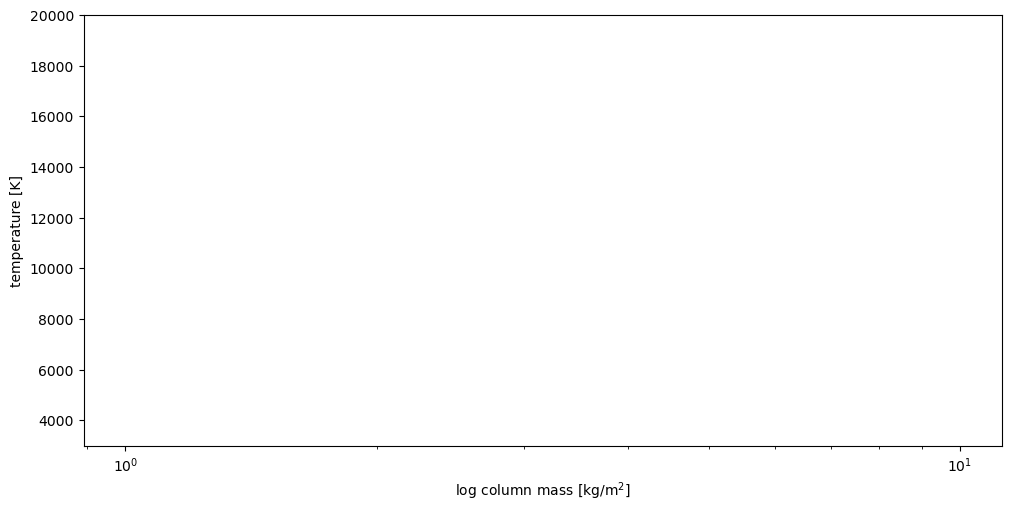

In [4]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 5), constrained_layout=True)

ax.set_xscale('log')

ax.set(xlabel='log column mass [kg/m$^2$]', ylabel='temperature [K]', ylim=[3.0E3, 2.0E4])
ax.plot(rhout.geometry.cmass, rhout.atmos.T, label=rhout.atmos.ID)
ax.plot(rhout2.geometry.cmass, rhout2.atmos.T, label=rhout2.atmos.ID)
ax.legend()
plt.show()

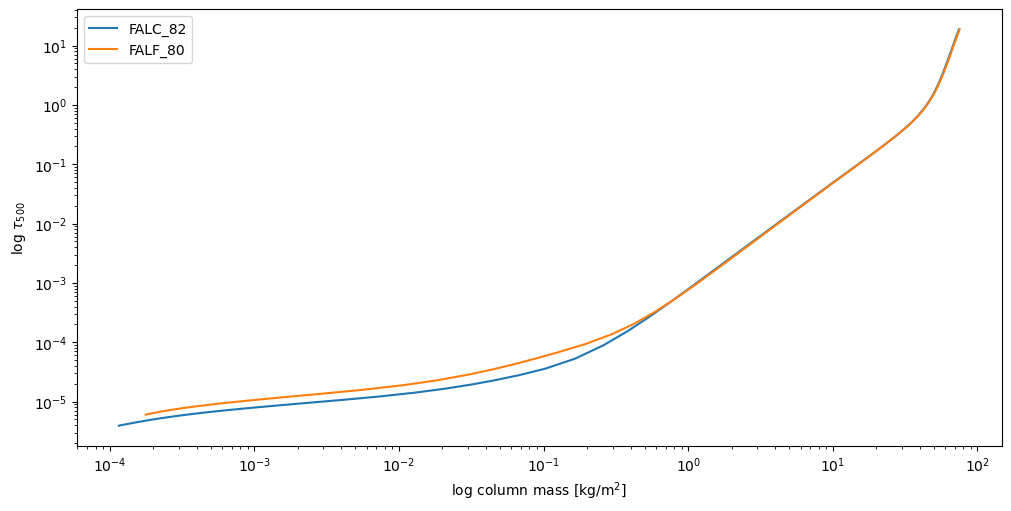

In [6]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 5), constrained_layout=True)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set(xlabel='log column mass [kg/m$^2$]', ylabel=r'log $\tau_{500}$')
ax.plot(rhout.geometry.cmass, rhout.geometry.tau500, label=rhout.atmos.ID)
ax.plot(rhout2.geometry.cmass, rhout2.geometry.tau500, label=rhout2.atmos.ID)
ax.legend()
plt.show()

In [7]:
fts = satlas()

In [8]:
print([atom.atomID for atom in rhout.atoms]) ## comprehension for the atom IDs
CaII = rhout.atoms[0]
print(CaII.E)
print([line.lambda0 for line in CaII.transition[0:CaII.Nline]])

NaI = rhout.atoms[2]
print([cont.shape for cont in NaI.transition[NaI.Nline:NaI.Nline+NaI.Ncont]])

['CA', 'H', 'NA']
[0.00000000e+00 2.71153853e-19 2.72359428e-19 5.00416111e-19
 5.04843704e-19 1.90272804e-18]
[396.8468382188923, 393.3663282700125, 866.2135336747579, 849.8018021807793, 854.2085677754852]
['EXPLICIT', 'EXPLICIT', 'EXPLICIT', 'EXPLICIT', 'EXPLICIT', 'EXPLICIT', 'EXPLICIT', 'EXPLICIT', 'HYDROGENIC', 'HYDROGENIC', 'HYDROGENIC']


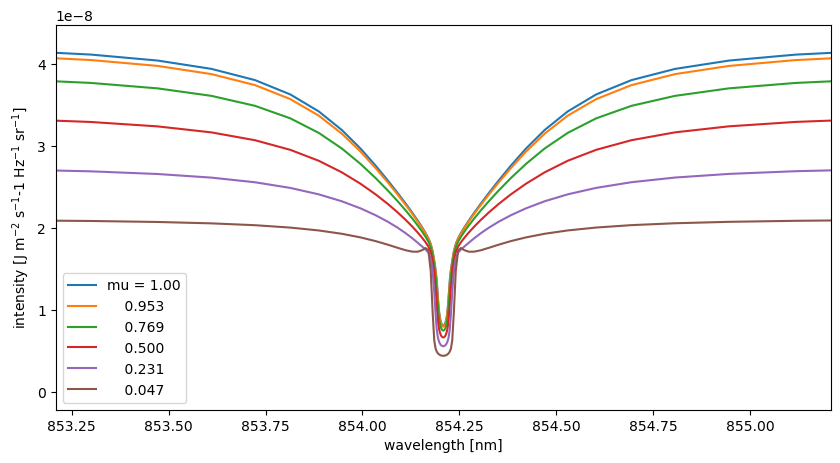

In [9]:
lambda_ref  = CaII.transition[4].lambda0
atlas_range = 1.0
lam_atlas, int_atlas, cont_atlas = fts.nmsiatlas(lambda_ref - atlas_range,  lambda_ref + atlas_range)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 5))
ax.set(xlim=[lambda_ref - atlas_range,  lambda_ref + atlas_range], xlabel='wavelength [nm]', \
       ylabel='intensity [J m$^{-2}$ s$^{-1}$-1 Hz$^{-1}$ sr$^{-1}$]')
ax.plot(rhout.spectrum.waves, rhout.rays[0].I, label='mu = 1.00')
for nmu in range(rhout.geometry.Nrays-1, -1, -1):
    label_str = "    {0:1.3f}".format(rhout.geometry.xmu[nmu])
    ax.plot(rhout.spectrum.waves, rhout.spectrum.I[nmu, :], label=label_str)
ax.legend()

plt.show()

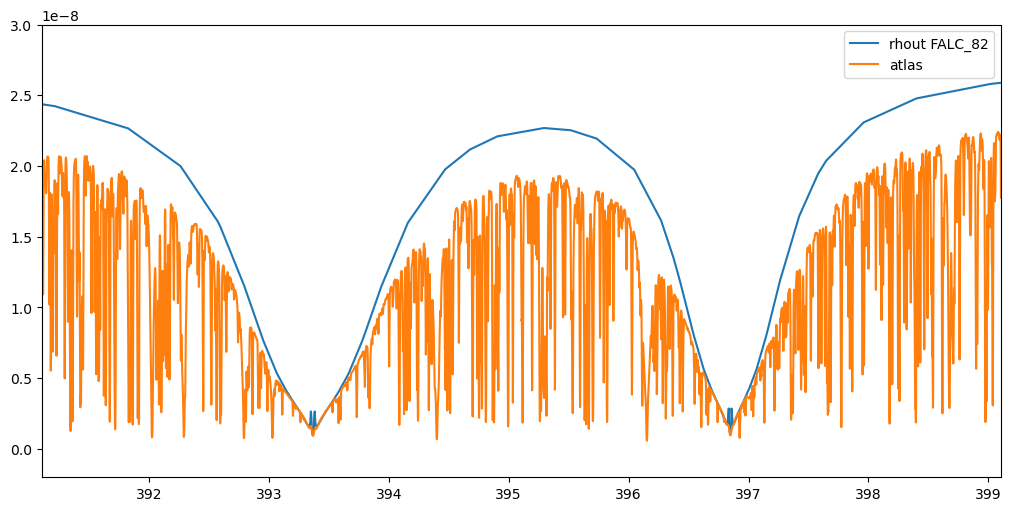

In [10]:
lambda_ref  = 0.5*(CaII.transition[0].lambda0 + CaII.transition[1].lambda0)
atlas_range = 4.0
lam_atlas, int_atlas, cont_atlas = fts.nmsiatlas(lambda_ref - atlas_range,  lambda_ref + atlas_range)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 5), constrained_layout=True)
ax.set(xlim=[lambda_ref-atlas_range, lambda_ref+atlas_range],
       ylim=[-0.2E-8, 3.0E-8])
ax.plot(rhout.spectrum.waves, rhout.rays[0].I, label='rhout ' + rhout.atmos.ID)
##ax.plot(rhout2.spectrum.waves, rhout2.rays[0].I, label='rhout ' + rhout2.atmos.ID)
ax.plot(lam_atlas, int_atlas, label="atlas")
ax.legend()
plt.show()

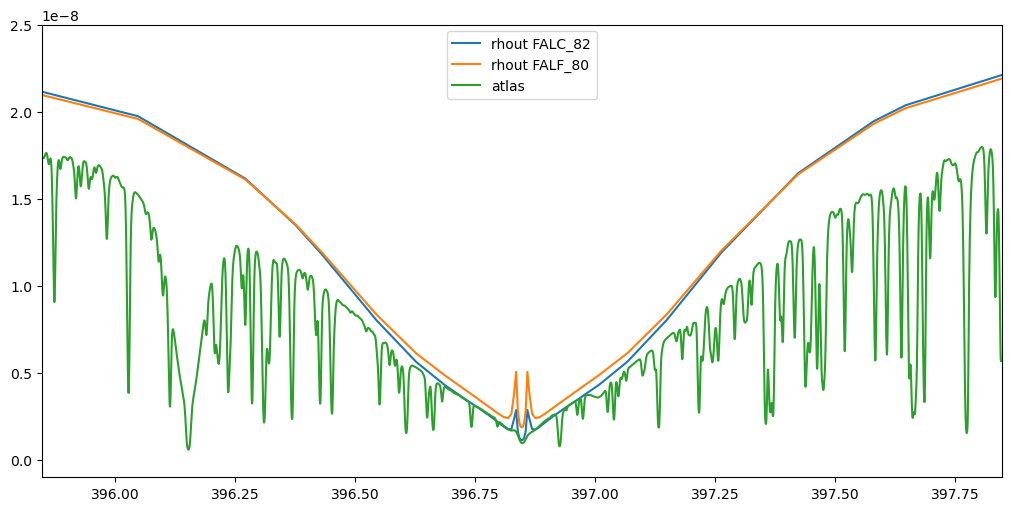

In [11]:
lambda_ref  = CaII.transition[0].lambda0
atlas_range = 1.0
lam_atlas, int_atlas, cont_atlas = fts.nmsiatlas(lambda_ref - atlas_range,  lambda_ref + atlas_range)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 5), constrained_layout=True)
ax.set(xlim=[lambda_ref-atlas_range, lambda_ref+atlas_range],
       ylim=[-0.1E-8, 2.5E-8])
ax.plot(rhout.spectrum.waves, rhout.rays[0].I, label='rhout ' + rhout.atmos.ID)
ax.plot(rhout2.spectrum.waves, rhout2.rays[0].I, label='rhout ' + rhout2.atmos.ID)
ax.plot(lam_atlas, int_atlas, label="atlas")
ax.legend()
plt.show()

[589.5921272885615, 588.9948313878823, 342.6861409894241, 330.2571931487577, 255.37729170709778, 1138.1443685635834, 818.3271769598364, 568.2637611678031, 450.53049528410975, 1140.3767479956075, 819.4806017674873, 568.8197312623322, 450.87988963802945, 2206.548148050518, 9106.13867666741, 1846.5352174677769, 1267.745030553323, 1083.3780184598425, 2336.885316305953, 1126.4153546854347, 3983.023191659788, 2595.367198552028, 2174.6161464244287, 4044.5396367706453, 2621.3468153707713, 2192.825572172976, 7449.549275317713, 4789.602279108562, 13413.944782429227]


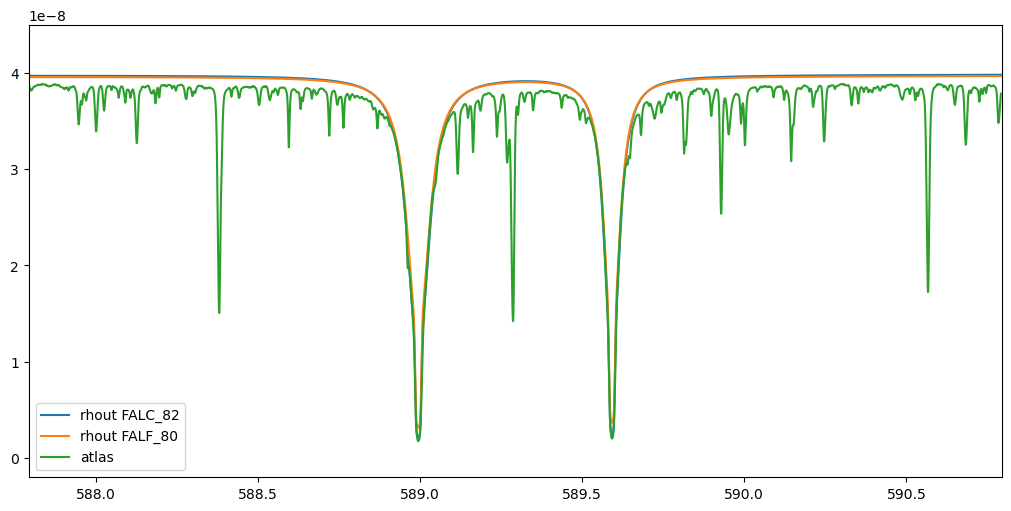

In [12]:
print([line.lambda0 for line in NaI.transition[0:NaI.Nline]])

lambda_ref  = 0.5*(NaI.transition[0].lambda0 + NaI.transition[1].lambda0)
atlas_range = 1.5
lam_atlas, int_atlas, cont_atlas = fts.nmsiatlas(lambda_ref - atlas_range,  lambda_ref + atlas_range)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 5), constrained_layout=True)
ax.set(xlim=[lambda_ref-atlas_range, lambda_ref+atlas_range],
       ylim=[-0.2E-8, 4.5E-8])
ax.plot(rhout.spectrum.waves, rhout.rays[0].I, label='rhout ' + rhout.atmos.ID)
ax.plot(rhout2.spectrum.waves, rhout2.rays[0].I, label='rhout ' + rhout2.atmos.ID)
ax.plot(lam_atlas, int_atlas, label="atlas")
ax.legend()
plt.show()

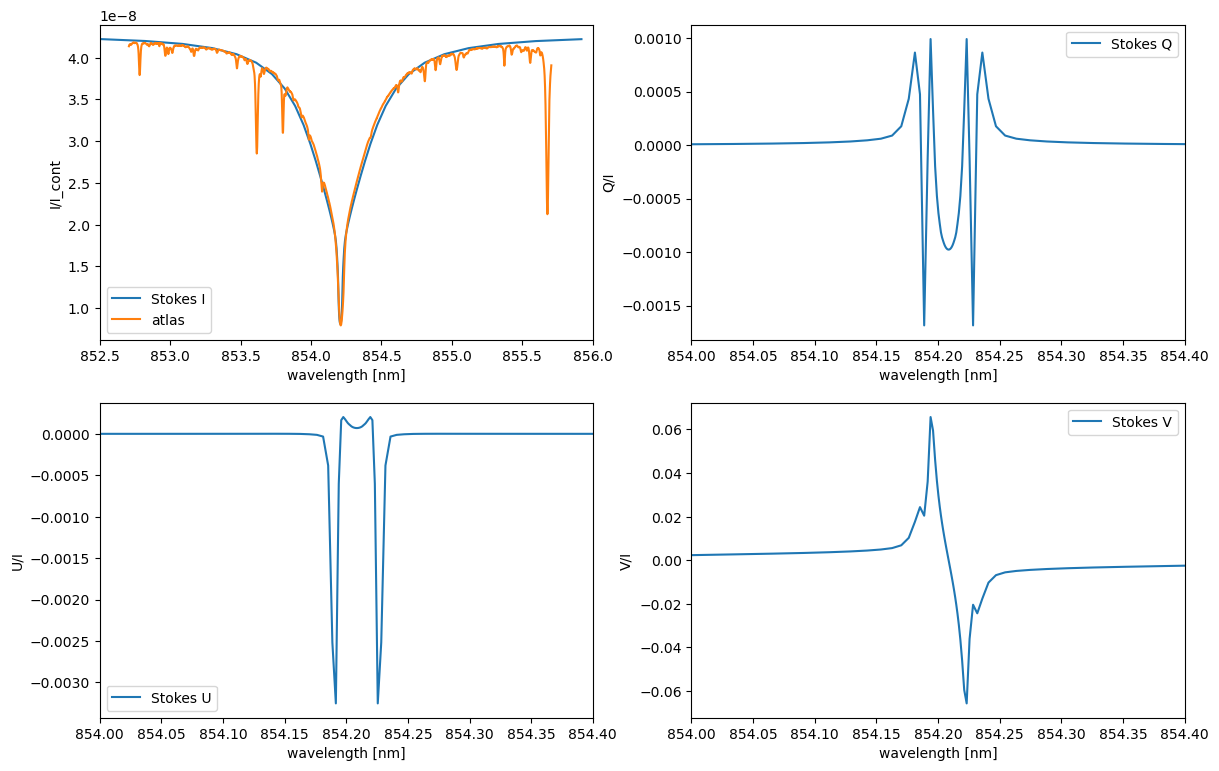

In [13]:
CaII_8542 = CaII.transition[4]

nblue = CaII_8542.Nblue
nred  = CaII_8542.Nblue + CaII_8542.Nwave

lambda_8542 = rhout.spectrum.waves[nblue:nred]
int_8542    = rhout.rays[0].I[nblue:nred]

lambda_ref  = CaII_8542.lambda0
atlas_range = 1.5
lam_atlas, int_atlas, cont_atlas = fts.nmsiatlas(lambda_ref - atlas_range,  lambda_ref + atlas_range)

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=[14, 9])
xlim = [852.5, 856.0]
xlim_QUV = [854.0, 854.4]
plt.xlabel('wavelength [nm]')

Stokes_I = int_8542
Stokes_Q = rhout.rays[0].Q[nblue:nred] / Stokes_I
Stokes_U = rhout.rays[0].U[nblue:nred] / Stokes_I
Stokes_V = rhout.rays[0].V[nblue:nred] / Stokes_I

axs[0, 0].plot(lambda_8542, Stokes_I, label='Stokes I')
axs[0, 0].plot(lam_atlas, int_atlas, label="atlas")
axs[0, 0].set(xlabel='wavelength [nm]', ylabel='I/I_cont', xlim=xlim)
axs[0, 0].legend()

axs[0, 1].plot(lambda_8542, Stokes_Q, label='Stokes Q')
axs[0, 1].set(xlabel='wavelength [nm]', ylabel='Q/I', xlim=xlim_QUV)
axs[0, 1].legend()

axs[1, 0].plot(lambda_8542, Stokes_U, label='Stokes U')
axs[1, 0].set(xlabel='wavelength [nm]', ylabel='U/I', xlim=xlim_QUV)
axs[1, 0].legend()

axs[1, 1].plot(lambda_8542, Stokes_V, label='Stokes V')
axs[1, 1].set(xlabel='wavelength [nm]', ylabel='V/I', xlim=xlim_QUV)
axs[1, 1].legend()

plt.show()

In [14]:
print([mol.ID for mol in rhout.atmos.molecules])

['H2', 'H2+', 'C2', 'N2', 'O2', 'CH', 'CO', 'CN', 'NH', 'NO', 'OH', 'H2O']


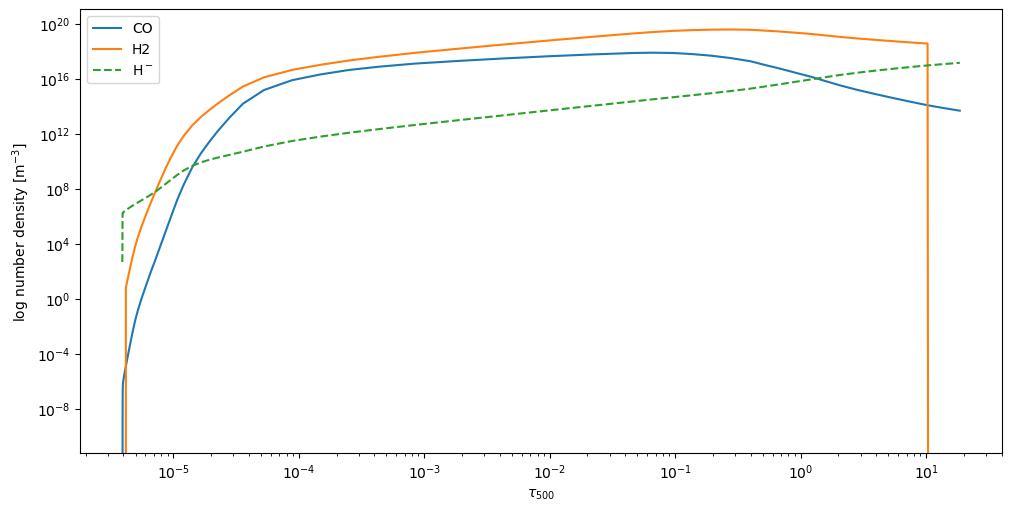

In [15]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 5), constrained_layout=True)

H2 = rhout.atmos.molecules[0]
CO = rhout.atmos.molecules[6]
Hmin = rhout.atmos.Hminus

ax.set(xscale='log', yscale='log', ylabel='log number density [m$^{-3}$]',\
      xlabel=r'$\tau_{500}$')

ax.plot(rhout.geometry.tau500, CO.n, label=CO.ID)
ax.plot(rhout.geometry.tau500, H2.n, label=H2.ID)
ax.plot(rhout.geometry.tau500, Hmin.n, linestyle='--', label=Hmin.label)
ax.legend()
plt.show()

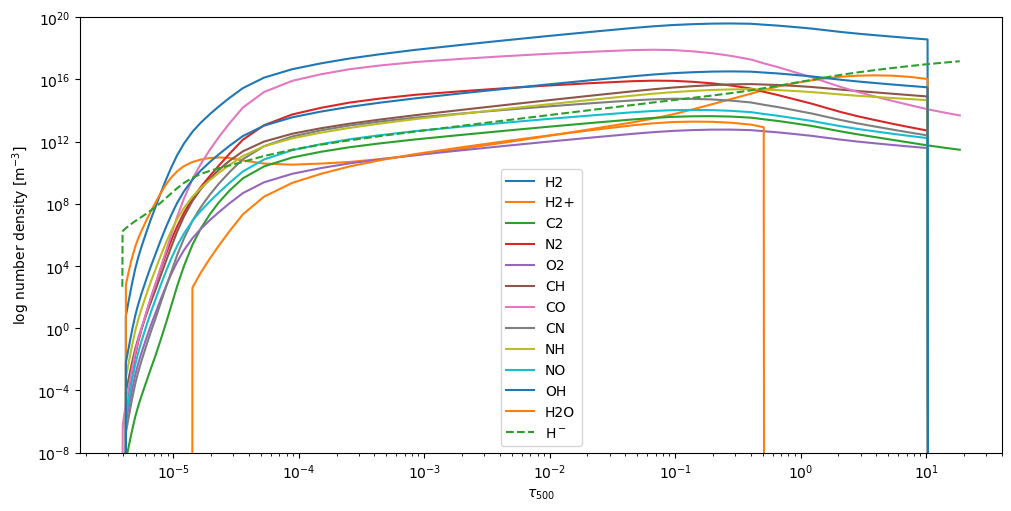

In [16]:
Hmin = rhout.atmos.Hminus

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 5), constrained_layout=True)
ax.set(xscale='log', yscale='log', ylabel='log number density [m$^{-3}$]',\
      xlabel=r'$\tau_{500}$', ylim=[1.0E-8, 1.0E20])

for mol in rhout.atmos.molecules:
    ax.plot(rhout.geometry.tau500, mol.n, label=mol.ID)
ax.plot(rhout.geometry.tau500, Hmin.n, linestyle='--', label=Hmin.label)
ax.legend()
plt.show()

(2244,)


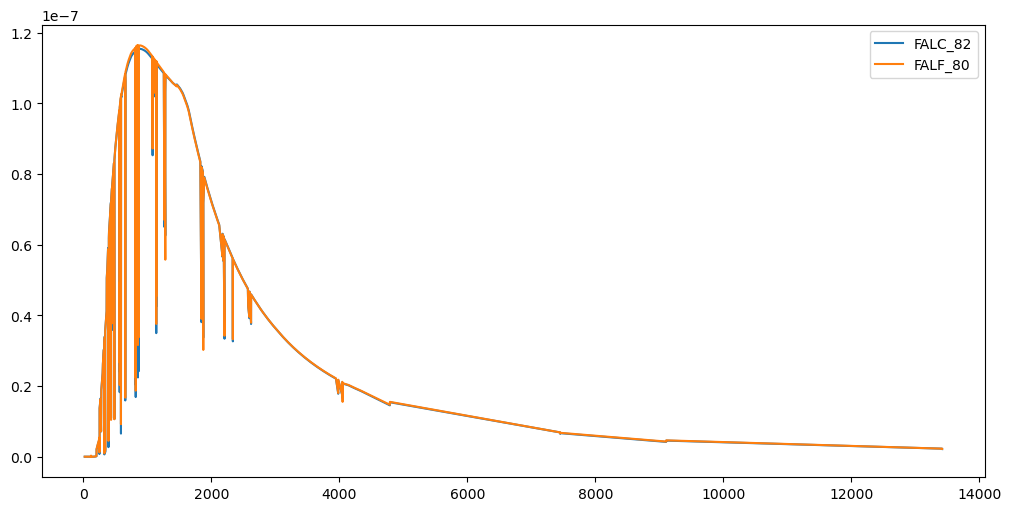

In [17]:
print(rhout.spectrum.flux.shape)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 5), constrained_layout=True)
ax.plot(rhout.spectrum.waves, rhout.spectrum.flux, label=rhout.atmos.ID)
ax.plot(rhout2.spectrum.waves, rhout2.spectrum.flux, label=rhout2.atmos.ID)
ax.legend()
plt.show()

In [1]:
gband_waves = np.linspace(429.0, 432.0, num=3000, dtype=np.float64)
wt = rht.wavetable(gband_waves)
wt.write(wavefile='Gband_hires.wave')

NameError: name 'np' is not defined

In [18]:
rhout3 = rhanalyze.rhout('/Users/hanuitenbroek/Source/RH/rhf1d/run_example3')
print([mol.ID for mol in rhout3.atmos.molecules])

['H2', 'CH', 'CO', 'CN']


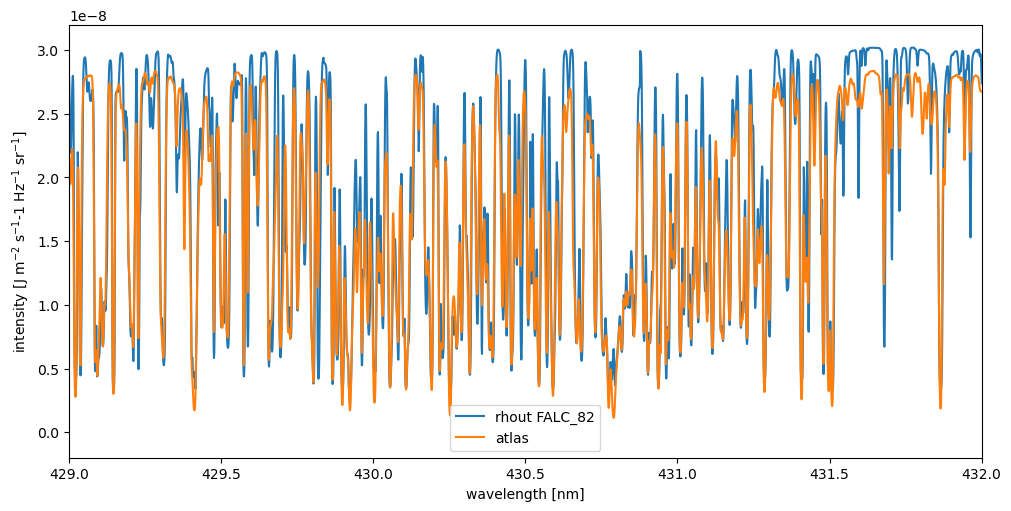

In [19]:
lambda_ref  = 430.5
atlas_range = 1.5
lam_atlas, int_atlas, cont_atlas = fts.nmsiatlas(lambda_ref - atlas_range,  lambda_ref + atlas_range)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 5), constrained_layout=True)
ax.set(xlim=[lambda_ref-atlas_range, lambda_ref+atlas_range], \
       ylim=[-0.2E-8, 3.2E-8], xlabel='wavelength [nm]', \
       ylabel='intensity [J m$^{-2}$ s$^{-1}$-1 Hz$^{-1}$ sr$^{-1}$]')
ax.plot(rhout3.spectrum.waves, rhout3.rays[0].I, label='rhout ' + rhout3.atmos.ID)
ax.plot(lam_atlas, int_atlas, label="atlas")
ax.legend()

plt.show()